                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     12.59
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           4.07e-08
Time:                        04:08:54   Log-Likelihood:                 117.56
No. Observations:                  60   AIC:                            -223.1
Df Residuals:                      54   BIC:                            -210.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.005      0.488      0.6

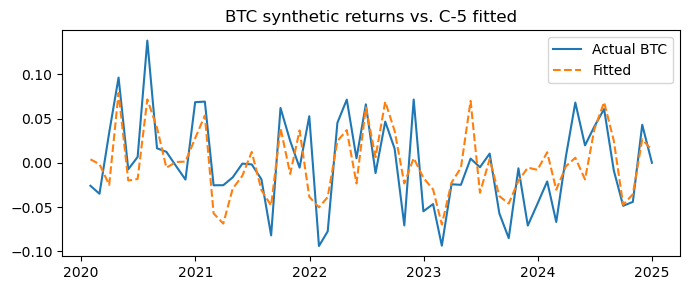

In [1]:

#  Импорт библиотек

import numpy as np, pandas as pd, pathlib, statsmodels.api as sm, matplotlib.pyplot as plt


In [2]:
# 1. Синтетические данные
dates = pd.date_range("2020-01-31", "2024-12-31", freq="M")
n = len(dates)
np.random.seed(42)

MKT = np.random.normal(0.04/12, 0.15/np.sqrt(12), n)      # market factor
SMB = np.random.normal(0.02/12, 0.10/np.sqrt(12), n)      # size
MOM = np.random.normal(0.03/12, 0.12/np.sqrt(12), n)      # momentum
VAL = -MOM + np.random.normal(0, 0.02, n)                 # value = inverse momentum + noise
NET = np.random.normal(0.01/12, 0.05/np.sqrt(12), n)      # network

In [3]:
# «истинные» бета-коэф-ты и альфа
alpha = 0.0
beta  = dict(MKT=0.9, SMB=0.4, MOM=0.3, VAL=0.5, NET=0.2)
BTC = (alpha + beta['MKT']*MKT + beta['SMB']*SMB + beta['MOM']*MOM +
       beta['VAL']*VAL + beta['NET']*NET + np.random.normal(0, 0.05, n))

df = pd.DataFrame({'Date': dates, 'BTC': BTC, 'MKT': MKT,
                   'SMB': SMB, 'MOM': MOM, 'VAL': VAL, 'NET': NET})

pathlib.Path("data").mkdir(exist_ok=True)
df.to_csv("data/factors.csv", index=False)


In [4]:

# 2. Регрессия
X = sm.add_constant(df[['MKT','SMB','MOM','VAL','NET']])
model = sm.OLS(df['BTC'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     12.59
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           4.07e-08
Time:                        04:10:35   Log-Likelihood:                 117.56
No. Observations:                  60   AIC:                            -223.1
Df Residuals:                      54   BIC:                            -210.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.005      0.488      0.6

In [ ]:
# 3. График фактических vs. прогнозных
df['Pred'] = model.predict(X)
plt.figure(figsize=(7,3))
plt.plot(df['Date'], df['BTC'], label='Actual BTC')
plt.plot(df['Date'], df['Pred'], linestyle='--', label='Fitted')
plt.title('BTC synthetic returns vs. C-5 fitted')
plt.legend(); plt.tight_layout()
pathlib.Path("plots").mkdir(exist_ok=True)
plt.savefig("plots/btc_synth_fit.png", dpi=200)
